<a href="https://colab.research.google.com/github/SawairaK/KNN/blob/main/KNN_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/heart_disease_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
#missing values
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#data splitting
X = data.drop(columns='target', axis=1)
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
metric_k=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    metric_k.append(acc)

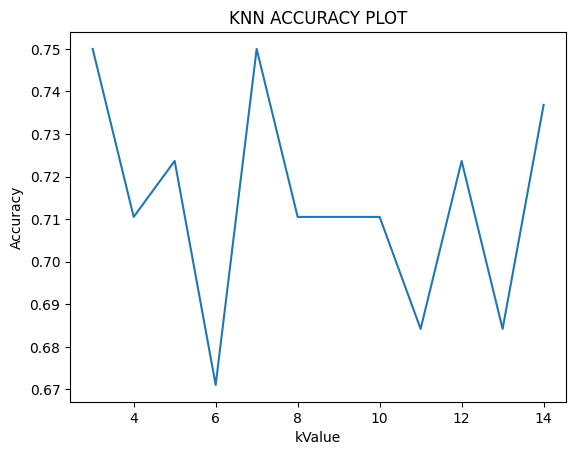

In [ ]:
plt.plot(neighbors, metric_k)
plt.title('KNN ACCURACY PLOT')
plt.xlabel('kValue')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7105263157894737

In [ ]:
confusion_matrix(y_test, y_pred)

array([[23, 13],
       [ 9, 31]])

In [ ]:
#K-Fold cross validation
from sklearn.model_selection import KFold
kfold_validator= KFold(10)
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 27

In [ ]:
#Accuracy checking
from sklearn.model_selection import cross_val_score
cv_result= cross_val_score(classifier,X,y,cv=kfold_validator)
cv_result

array([0.51612903, 0.61290323, 0.67741935, 0.6       , 0.46666667,
       0.66666667, 0.36666667, 0.6       , 0.63333333, 0.5       ])

In [ ]:
np.mean(cv_result)

0.5639784946236558

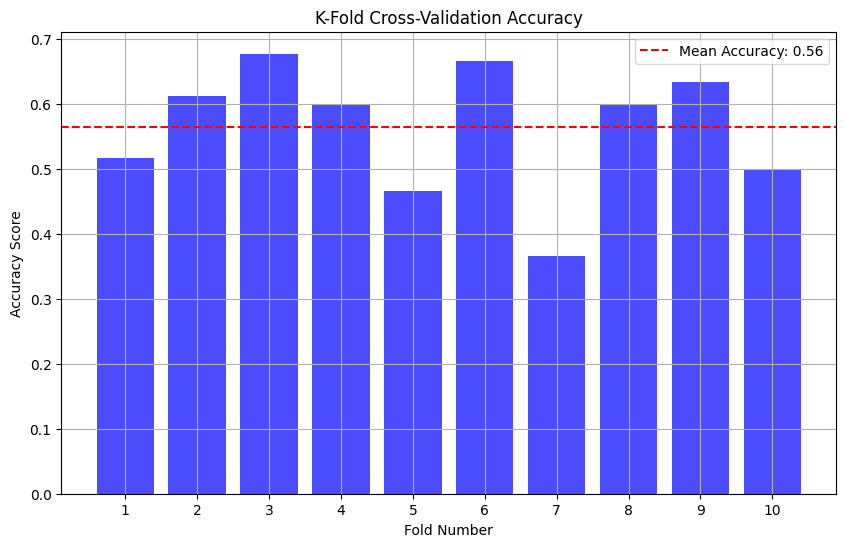

In [ ]:
# Perform Cross-Validation
cv_result = cross_val_score(classifier, X, y, cv=kfold_validator)

# Plotting K-Fold Cross-Validation Results
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_result) + 1), cv_result, color='blue', alpha=0.7)
plt.axhline(np.mean(cv_result), color='red', linestyle='--', label=f'Mean Accuracy: {np.mean(cv_result):.2f}')
plt.title('K-Fold Cross-Validation Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.xticks(range(1, len(cv_result) + 1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
##STRATIFIED K-Fold cross validation
from sklearn.model_selection import StratifiedKFold
skfold_validator= StratifiedKFold(n_splits= 10)
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 27

In [ ]:
scv_result= cross_val_score(classifier,X,y,cv=skfold_validator)
scv_result

array([0.61290323, 0.5483871 , 0.61290323, 0.73333333, 0.76666667,
       0.53333333, 0.66666667, 0.76666667, 0.53333333, 0.63333333])

In [ ]:
np.mean(scv_result)

0.6407526881720429

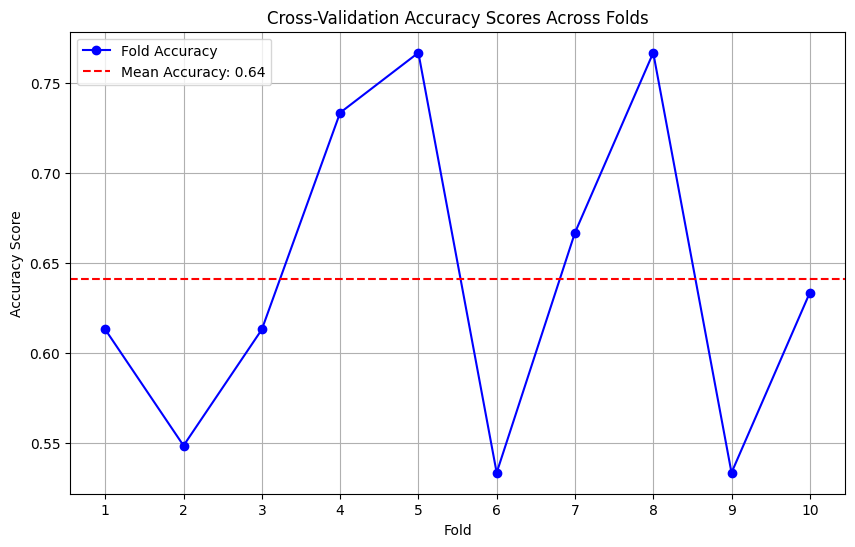

In [ ]:
# Plotting Cross-Validation Results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scv_result) + 1), scv_result, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(np.mean(scv_result), color='r', linestyle='--', label=f'Mean Accuracy: {np.mean(scv_result):.2f}')
plt.title('Cross-Validation Accuracy Scores Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.xticks(range(1, len(scv_result) + 1))
plt.legend()
plt.grid(True)
plt.show()